# ✊🤚✌️ 1.1 인공지능과 가위바위 보 하기

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="400" height="400">

### 간단한 이미지 분류기

안녕하세요. 이번 시간에는 이미지를 분류하는 간단한 인공지능을 만들어 볼 예정입니다. 이번 코스를 진행하고 나면, 여러분들은 숫자 손글씨를 인식할 수도 있구요. 가위바위보 게임을 만들어볼 수도 있습니다. 숫자는 0~9까지 총 10개의 클래스(class)만 인식을 하면 되고, 가위바위보는 총 3개의 클래스만 구분을 해내면 되죠. 이렇게 클래스가 몇 개 안되는 경우, 인공지능은 간단하게 이미지를 분류해 낼 수 있습니다.

### 숫자 손글씨 인식기 만들기 (Sequential Model을 이용하는 방법)

<img src="https://aiffelstaticprd.blob.core.windows.net/media/images/E-1-3.max-800x600.jpg" width="400" height="500">

숫자 손글씨 분류기는 손으로 쓴 숫자 이미지를 입력으로 받으면, 그 이미지가 어떤 숫자를 나타내는지 출력해 낼 수 있습니다. 위 그림에서 보면, 숫자 0에 해당하는 이미지가 입력으로 들어오면 숫자 0을 출력으로, 숫자 5에 해당하는 이미지가 입력으로 들어오면 숫자 5를 출력으로 내보내고 있습니다. 우리는 딥러닝 기술을 이용해서 이런 숫자 손글씨 분류기를 만들거예요.       

---
### 어떻게 만들지?🧐

일반적으로 딥러닝 기술은:

1. 데이터 준비 
2. 딥러닝 네트워크 설계 
3. 학습 
4. 테스트(평가)

의 순서대로 만들게 됩니다. 우리도 이 과정을 따를 거예요.   

---

# 🏃🏻‍♀️ 1.2 데이터 준비     

### MNIST 숫자 손글씨 Dataset 불러들이기    

--- 
    오늘은 텐서플로우(TensorFlow)의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기를 만들 거예요.     
    구글(Google)에서 오픈소스로 제공하는 텐서플로우는 가장 널리 사용되고 있는 머신러닝 라이브러리 중 하나입니다. 앞으로 대부분의 딥러닝 구현실습은 Tensorflow 버전 2.0(혹은 그 이상)에서 진행될 예정입니다.    
    
    자, 그럼 TF 2.0이 설치된 환경에서 먼저 다음의 코드를 실행해 봅시다. 앞으로 보게 될 코드의 구체적인 의미와 메커니즘은 이후에 더 자세하게 배우게 될 테니, 지금은 완벽하게 이해하지 못하더라도 마음 편하게 실행해 보세요.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)    
# tensorflow 버전 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.0.0
60000


The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. **the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.**

---

## 손글씨 숫자 이미지 출력하기

자, 한번 불러들인 숫자 손글씨 이미지 하나를 출력해볼까요?
MNIST 데이터셋의 X항목(위 코드에서는 xtrain, xtest)은 이미지 데이터를 담은 행렬(matrix)입니다.

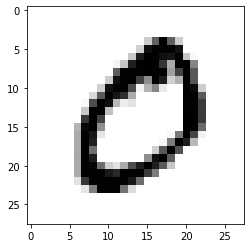

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

숫자 0 이미지가 나왔나요? 주의할 것은, xtrain[1]에 담긴 이미지는 xtrain 행렬의 1번째가 아니라 2번째 이미지라는 점입니다.    
1번째 이미지는 x_train[0]에 담겨 있습니다.

그렇다면 Y항목에는 어떤 값이 들어 있을까요? y_train 행렬의 2번째 값을 확인해 봅시다.

In [3]:
print(y_train[1])

0


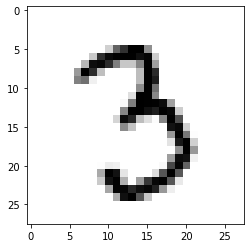

30001 번째 이미지의 숫자는 바로, 3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=30000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로,',  y_train[index], '입니다.')

파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등     
다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공합니다.

---

학습용 데이터 (x_train, y_train) 먼저 - 그 다음 시험용 데이터 (x_test, y_test)

In [5]:
# 불러들인 학습용 데이터는 과연 몇 장일까요?
print(x_train.shape)

(60000, 28, 28)


In [6]:
# 불러들인 시험용 데이터는 과연 몇 장일까요?
print(x_test.shape)

(10000, 28, 28)


---
## 데이터 전처리 하기 - Preprocessing Data     
숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가집니다. 한번 확인해 볼까요?

In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주기. 확인을 위해 255로 나누어 주기.

In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 🔨 1-3. 딥러닝 네트워크 설계하기    

---

## Sequenential Model을 사용해 보자     

Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법입니다.     
여러분들은 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있습니다.


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


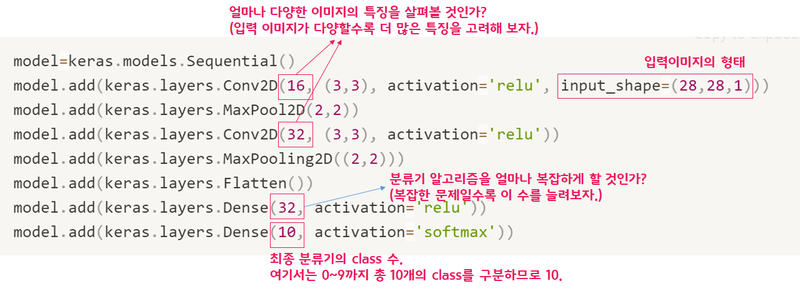

In [10]:
# 만든 딥러닝 네트워크 모델을 확인해 보려면, model.summary() 메소드를 이용하면 됩니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 1-4. 🖋 딥러닝 네트워크 학습시키기

우리가 만든 네트워크의 입력은 대충 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 이렇다.

스텝에서 첫번째 레이어에 <mark>input_shape=(28,28,1)</mark>로 지정했던 것을 기억하시나요?     
그런데 print(x_train.shape) 을 해보면,(60000, 28, 28) 로 채널수에 대한 정보가 없습니다.    
따라서 <mark>(60000, 28, 28, 1)</mark> 로 만들어 주어야 합니다 (여기서 채널수 1은 흑백 이미지를 의미합니다.     
컬러 이미지라면 <mark>R, G, B</mark> 세 가지 값이 있기 때문에 3이겠죠?).

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 1)  
x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


## x_train 학습 데이터로 딥러닝 네트워크를 학습시켜 봅시다.     

여기서 <mark>epochs=10</mark> 은 전체 <mark>60,000개</mark>의 데이터를 <mark>10번 반복</mark> 사용해서 학습을 시키라는 뜻입니다.     
물론 model의 입력 정의에 형태를 맞춘 <mark>x_train_reshaped</mark>가 사용되어야겠죠. 자 그러면 코드를 실행해 봅시다.

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

# 각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다. 인식 정확도가 0.9413에서 0.9957까지 매우 높게 올라가는군요. 
# 9 epoch정도부터는 인식률의 상승이 미미합니다. 10 epoch정도 학습을 시키면 충분할 것 같네요.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0113 - accuracy: 0.9962
Epoch 2/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0100 - accuracy: 0.9967
Epoch 3/10
60000/60000 [==============================] - 22s 359us/sample - loss: 0.0082 - accuracy: 0.9972
Epoch 4/10
60000/60000 [==============================] - 21s 350us/sample - loss: 0.0085 - accuracy: 0.9972
Epoch 5/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0071 - accuracy: 0.9976
Epoch 6/10
60000/60000 [==============================] - 22s 374us/sample - loss: 0.0064 - accuracy: 0.9979
Epoch 7/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0052 - accuracy: 0.9982
Epoch 8/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0066 - accuracy: 0.9977
Epoch 9/10
60000/60000 [==============================] - 23s 382us/sample - loss: 0.0050 - accuracy: 0.9

# 🤖 1-5. 얼마나 잘 만들었는지 확인하기   

---

## 테스트 데이터로 성능을 확인해 보자    

사실 위의 인식 정확도는 학습용 데이터<mark>(x_train)</mark>을 가지고 구한 것입니다.     
즉, 연습문제를 잘푸는 인공지능을 만든 거죠. 우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있을까요?    
자 그러면 시험용 데이터<mark>(x_test)</mark>를 가지고 확인해 봅시다.

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10000/1 - 2s - loss: 0.0249 - accuracy: 0.9904
test_loss: 0.04984616683148999 
test_accuracy: 0.9904000163078308


---

## 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자    

<mark>model.evaluate()</mark> 대신 <mark>model.predict()</mark>를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다.      
우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 <mark>확률값</mark>을 출력하는 함수입니다.       
이 함수의 출력값 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 거죠.

In [26]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.3402807e-12 7.4648067e-17 9.4690855e-10 3.2763810e-14 2.9033024e-12
 2.4758512e-14 7.3037568e-21 1.0000000e+00 6.6749801e-13 1.7552542e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


model.predict() 결과가 [9.5208375e-15 2.8931768e-11 1.2696462e-09 2.0265421e-08 6.1321614e-11 2.9599554e-12 1.0710074e-15 1.0000000e+00 1.0549885e-11 3.8589491e-08] 의 벡터 형태로 나왔나요?    
이 벡터는 model이 추론한 결과가 각각 0, 1, 2, …, 7, 8, 9일 확률을 의미합니다.     
이 경우라면 model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다,     


즉 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이 됩니다.

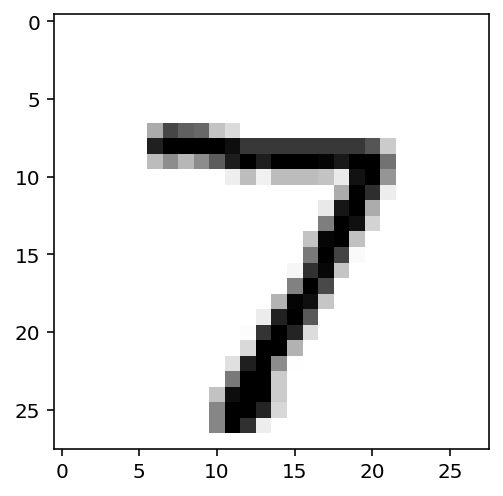

In [27]:
# 정말 숫자 7이 맞을까?

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

## model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인 해보기

예측확률분포: [2.3646668e-02 1.7629416e-13 5.3908780e-11 2.1529636e-09 1.4758085e-16
 9.7633630e-01 3.5593192e-07 2.0106126e-18 1.6104668e-05 6.0472013e-07]
라벨: 6, 예측결과: 5


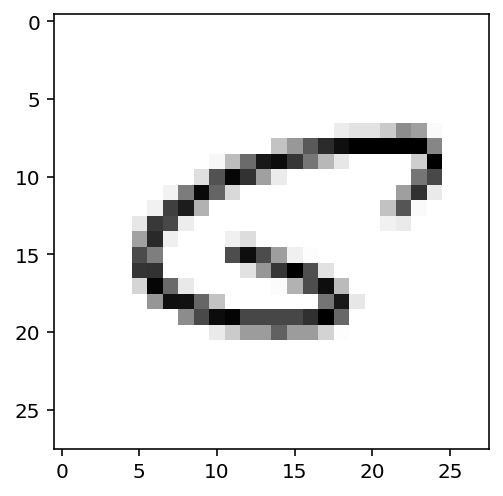

예측확률분포: [1.3779060e-15 2.8788279e-11 1.0179413e-07 7.5468375e-07 5.7190489e-02
 1.8843399e-12 5.5887503e-18 3.6702809e-01 4.0753443e-06 5.7577652e-01]
라벨: 7, 예측결과: 9


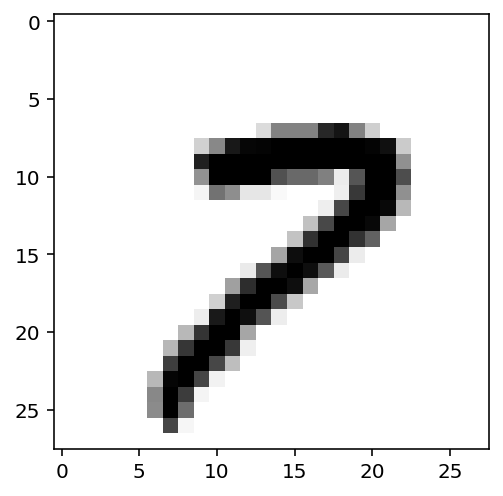

예측확률분포: [3.3532328e-04 3.2563609e-08 9.9954033e-01 3.4013282e-13 5.5198630e-15
 6.9612448e-05 7.0451388e-06 8.0757921e-11 4.7716578e-05 4.3582166e-15]
라벨: 5, 예측결과: 2


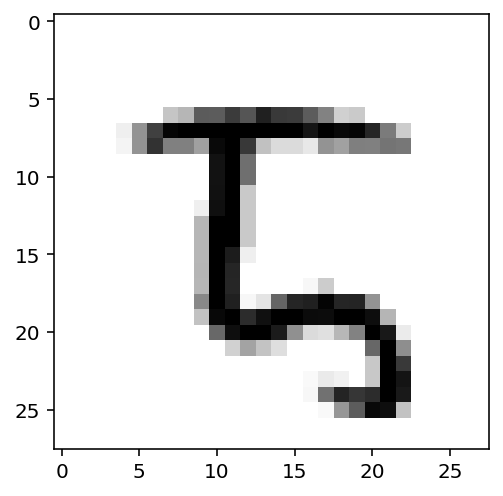

예측확률분포: [3.9704023e-19 2.7243910e-10 1.2087653e-11 2.0756642e-19 9.9999750e-01
 3.7705124e-11 1.4686688e-12 4.5125428e-10 1.9973329e-06 4.9377235e-07]
라벨: 9, 예측결과: 4


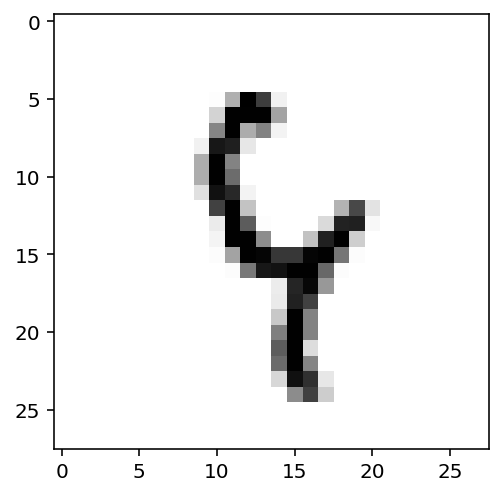

예측확률분포: [5.0843872e-13 1.1341502e-11 9.1648537e-01 5.1587580e-08 1.4188086e-23
 4.7028852e-19 1.5600812e-17 2.8039768e-15 8.3514571e-02 1.3183542e-24]
라벨: 8, 예측결과: 2


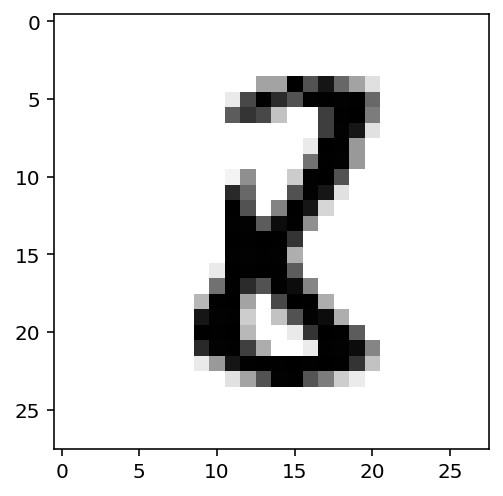

In [28]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있습니다.     
model의 추론 결과를 시각화하여 살펴보는 것은 향후 model성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나입니다.

# 🌐 1-6. 더 좋은 네트워크 만들어 보기

---

그러면 인식률을 다시 99점대로 만들수 없을까요? 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있습니다.     
Step 3에서 살펴본 <mark>하이퍼파라미터</mark>들을 바꾸어 보는 것인데요.     
- <mark>Conv2D 레이어</mark>에서 입력 **이미지의 특징 수**를 늘리거나 줄여 보거나,     
- <mark>Dense 레이어</mark>에서 **뉴런 수**를 바꾸어 보거나,     
- <mark>학습 반복 횟수</mark>인 **epoch 값**을 변경해 볼 수 있을 겁니다.

In [30]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=8
n_channel_2=16
n_dense=40
n_train_epoch=10

# 네트워크 설계, 모델 레이어 만들기
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                16040     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

# 1-7. 프로젝트: 가위바위보 분류기 만들기

자 지금껏, 우리는:

1. 데이터를 먼저 **준비**하였고
2. 딥러닝 네트워크를 **설계**하였고
3. 네트워크를 **학습**시키고
4. 성능을 **확인**하고
5. 성능을 **발전**시켜보았다!

같은 내용으로 가위 바위 보 분류기를 만들어 보자 🔧 두둥탁!

---

## 가위 바위 보 이미지 데이터 준비하기

https://teachablemachine.withgoogle.com/

> 요기 가서 웹캠으로 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어준다.

- 여러 각도에서 찍어보세요.
- 여러 크기로 찍어보세요.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

### 이미지 데이터를 저장 할 디렉토리를 만들어주자     

- mkdir -p ~/aiffel/rock_scissor_paper/scissor   
- mkdir -p ~/aiffel/rock_scissor_paper/rock    
- mkdir -p ~/aiffel/rock_scissor_paper/paper    

- ls -l ~/aiffel/rock_scissor_paper 

mkdir에서 -p 옵션은 존재하지 않는 중간 디렉터리를 알아서 만들어주기도 한다! 유용함.    
그리고 특정 파일에 대한 상세한 정보를 확인하고 싶을 때 사용하는 명령어가 'ls -l' 이다


In [32]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
# !pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 이미지 resize 하기!  

In [ ]:
# The OS module in python provides functions for interacting with the operating system.
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

In [ ]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

In [ ]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images = glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size = (28, 28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

glob.glob(pathname, *, recursive=False):

경로 지정을 포함하는 문자열인 pathname에 일치하는 경로 이름의 비어있을 수 있는 리스트를 반환합니다.     
pathname은 절대(/usr/src/Python-1.5/Makefile처럼)나 상대(../../Tools/*/*.gif처럼)일 수 있으며,     
셸 스타일 와일드카드를 포함할 수 있습니다. 깨진 심볼릭 링크가 결과에 포함됩니다 (셸과 마찬가지로).     
결과가 정렬되는지는 파일 시스템에 따라 다릅니다. 이 함수 호출 중에 조건을 만족하는 파일이 제거되거나 추가되면,     
해당 파일의 경로 이름이 포함되는지는 지정되지 않습니다.

recursive가 참이면, 《**》 패턴은 모든 파일과 0개 이상의 디렉터리, 서브 디렉터리 및 디렉터리로의 심볼릭 링크와 일치합니다. 패턴 다음에 os.sep이나 os.altsep이 오면, 파일은 일치하지 않습니다.

pathname, recursive를 인자로 감사 이벤트(auditing event) glob.glob을 발생시킵니다.

참고 | 커다란 디렉터리 트리에서 《**》 패턴을 사용하면 과도한 시간이 걸릴 수 있습니다.    
버전 3.5에서 변경: 《**》 를 사용하는 재귀적 glob 지원.

숫자 손글씨 인식기는 <mark>mnist.load_data()</mark> 라는 함수로 데이터를 읽었던 것 기억하시죠?     
여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 <mark>load_data()</mark> 함수를 만들어 드릴 거예요.     
이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

<mark>load_data()</mark> 함수는 **입력으로 이미지가 있는 폴더 위치**를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다.     
그리고, 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠?     
가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

---

### load_data() 함수써서 입력으로 이미지가 있는 폴더 위치를 받기!

In [34]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


---

### 가위바위보를 인식하는 딥러닝 네트워크 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

---

### 가위바위보 딥러닝 네트워크 학습시키기

---

### 얼마나 가위바위보 잘 인식하는지 확인하기(테스트)

---

### 더 좋은 네트워크 만들어보기